# **MÓDULO 25 - AULA 1**
# Filtragem de Dados e Distinct

In [16]:
import sqlite3
import pandas as pd

In [17]:
df_funcionarios = pd.read_csv("SQL_TB_FUNCIONARIOS.csv", delimiter=';')

In [18]:
# Criar uma conexão com um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')
# Carregar o DataFrame no banco de dados SQLite
df_funcionarios.to_sql('tb_funcionarios', conn, index=False, if_exists='replace')

10

In [19]:
# Função para executar consultas SQL e retornar o resultado como um DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

In [20]:
#Visualizando toda tabela
query = "SELECT * FROM tb_funcionarios"
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136         TI  JUNIOR     2500                 0
1  125         TI  SENIOR     6000                 1
2  148         TI  SENIOR     6000                 2
3  456        ADM   PLENO     4500                 2
4  345        ADM   PLENO     4600                 4
5  254        ADM  SENIOR     5600                 5
6  178        ADM  JUNIOR     2200                 0
7  365  MARKETING  JUNIOR     2300                 1
8  145  MARKETING  SENIOR     5500                 3
9  258  MARKETING   PLENO     4600                 2


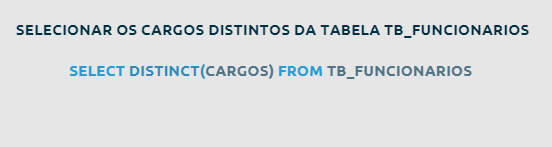

In [21]:
#Sem distinct
query = "SELECT CARGO FROM tb_funcionarios"
result_df = run_query(query)
print(result_df)

    CARGO
0  JUNIOR
1  SENIOR
2  SENIOR
3   PLENO
4   PLENO
5  SENIOR
6  JUNIOR
7  JUNIOR
8  SENIOR
9   PLENO


In [22]:
#Com distinct
query = "SELECT DISTINCT(CARGO) FROM tb_funcionarios"
result_df = run_query(query)
print(result_df)

    CARGO
0  JUNIOR
1  SENIOR
2   PLENO


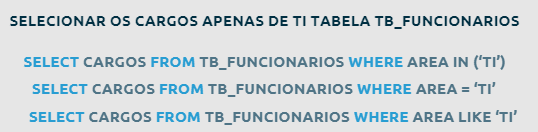

In [23]:
#Com IN
query = """
SELECT
CARGO
FROM tb_funcionarios
WHERE ÁREA IN ('TI')
"""
result_df = run_query(query)
print(result_df)

    CARGO
0  JUNIOR
1  SENIOR
2  SENIOR


In [24]:
#Com IN + LISTA
query = """
SELECT
CARGO
FROM tb_funcionarios
WHERE ÁREA IN ('TI','ADM')
"""
result_df = run_query(query)
print(result_df)

    CARGO
0  JUNIOR
1  SENIOR
2  SENIOR
3   PLENO
4   PLENO
5  SENIOR
6  JUNIOR


In [25]:
#Com IN + LISTA + TODAS COLUNAS
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA IN ('TI','ADM')
"""
result_df = run_query(query)
print(result_df)

    ID ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136   TI  JUNIOR     2500                 0
1  125   TI  SENIOR     6000                 1
2  148   TI  SENIOR     6000                 2
3  456  ADM   PLENO     4500                 2
4  345  ADM   PLENO     4600                 4
5  254  ADM  SENIOR     5600                 5
6  178  ADM  JUNIOR     2200                 0


In [26]:
#Com =
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA = 'TI'
"""
result_df = run_query(query)
print(result_df)

    ID ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136   TI  JUNIOR     2500                 0
1  125   TI  SENIOR     6000                 1
2  148   TI  SENIOR     6000                 2


In [27]:
#Com LIKE
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA like 'TI'
"""
result_df = run_query(query)
print(result_df)

    ID ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136   TI  JUNIOR     2500                 0
1  125   TI  SENIOR     6000                 1
2  148   TI  SENIOR     6000                 2


O caractere % é um coringa (wildcard) usado com LIKE que representa zero ou mais caracteres. Quando você utiliza % dentro de uma expressão LIKE, ele pode combinar com qualquer sequência de caracteres.

In [28]:
#Com LIKE+ coringa + inicio e final
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA like '%T%'
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136         TI  JUNIOR     2500                 0
1  125         TI  SENIOR     6000                 1
2  148         TI  SENIOR     6000                 2
3  365  MARKETING  JUNIOR     2300                 1
4  145  MARKETING  SENIOR     5500                 3
5  258  MARKETING   PLENO     4600                 2


In [29]:
#Com LIKE + coringa + final
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA like 'T%'
"""
result_df = run_query(query)
print(result_df)

    ID ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136   TI  JUNIOR     2500                 0
1  125   TI  SENIOR     6000                 1
2  148   TI  SENIOR     6000                 2


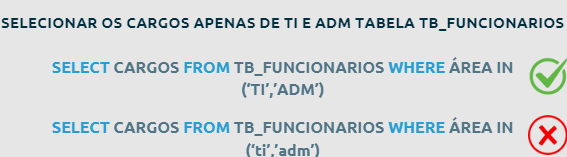

In [30]:
#Com LIKE + coringa + final
query = """
SELECT
CARGO
FROM tb_funcionarios
WHERE ÁREA IN ('adm','ti')
"""
result_df = run_query(query)
print(result_df)

Empty DataFrame
Columns: [CARGO]
Index: []


# **MÓDULO 25 - AULA 2**
# Operadores de Comparação e Lógicos

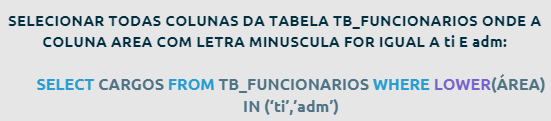

In [31]:
query = """
SELECT
CARGO
FROM tb_funcionarios
WHERE LOWER(ÁREA) IN ('adm','ti')
"""
result_df = run_query(query)
print(result_df)

    CARGO
0  JUNIOR
1  SENIOR
2  SENIOR
3   PLENO
4   PLENO
5  SENIOR
6  JUNIOR


In [32]:
query = """
SELECT
LOWER(CARGO)
FROM tb_funcionarios
"""
result_df = run_query(query)
print(result_df)

  LOWER(CARGO)
0       junior
1       senior
2       senior
3        pleno
4        pleno
5       senior
6       junior
7       junior
8       senior
9        pleno


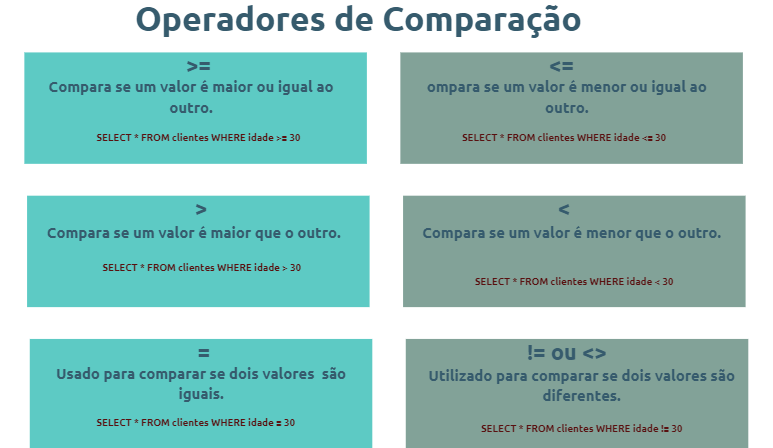

In [33]:
# >=
query = """
SELECT
*
FROM tb_funcionarios
WHERE SALÁRIO >= 2000
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136         TI  JUNIOR     2500                 0
1  125         TI  SENIOR     6000                 1
2  148         TI  SENIOR     6000                 2
3  456        ADM   PLENO     4500                 2
4  345        ADM   PLENO     4600                 4
5  254        ADM  SENIOR     5600                 5
6  178        ADM  JUNIOR     2200                 0
7  365  MARKETING  JUNIOR     2300                 1
8  145  MARKETING  SENIOR     5500                 3
9  258  MARKETING   PLENO     4600                 2


In [34]:
# >= + CONTAGEM
query = """
SELECT
COUNT(ID)
FROM tb_funcionarios
WHERE SALÁRIO >= 2000
"""
result_df = run_query(query)
print(result_df)

   COUNT(ID)
0         10


In [35]:
# <= + CONTAGEM
query = """
SELECT
COUNT(ID)
FROM tb_funcionarios
WHERE SALÁRIO <= 2000
"""
result_df = run_query(query)
print(result_df)


   COUNT(ID)
0          0


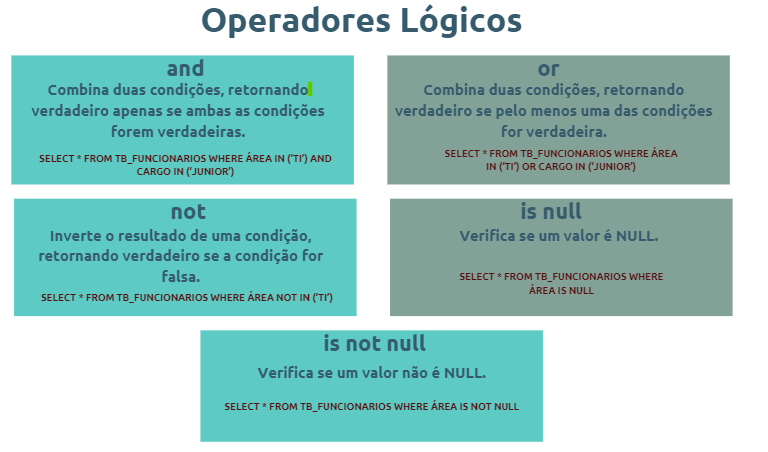

In [36]:
# AND
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA IN ('TI')
AND CARGO IN ('JUNIOR')
"""
result_df = run_query(query)
print(result_df)

    ID ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136   TI  JUNIOR     2500                 0


In [37]:
# OR
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA IN ('TI')
OR CARGO IN ('JUNIOR')
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136         TI  JUNIOR     2500                 0
1  125         TI  SENIOR     6000                 1
2  148         TI  SENIOR     6000                 2
3  178        ADM  JUNIOR     2200                 0
4  365  MARKETING  JUNIOR     2300                 1


In [38]:
# NOT
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA NOT IN ('TI')
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  456        ADM   PLENO     4500                 2
1  345        ADM   PLENO     4600                 4
2  254        ADM  SENIOR     5600                 5
3  178        ADM  JUNIOR     2200                 0
4  365  MARKETING  JUNIOR     2300                 1
5  145  MARKETING  SENIOR     5500                 3
6  258  MARKETING   PLENO     4600                 2


In [39]:
# IS NULL
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA IS NULL
"""
result_df = run_query(query)
print(result_df)

Empty DataFrame
Columns: [ID, ÁREA, CARGO, SALÁRIO, TEMPO_NA_EMPRESA]
Index: []


In [40]:
# IS NOT NULL
query = """
SELECT
*
FROM tb_funcionarios
WHERE ÁREA IS NOT NULL
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  136         TI  JUNIOR     2500                 0
1  125         TI  SENIOR     6000                 1
2  148         TI  SENIOR     6000                 2
3  456        ADM   PLENO     4500                 2
4  345        ADM   PLENO     4600                 4
5  254        ADM  SENIOR     5600                 5
6  178        ADM  JUNIOR     2200                 0
7  365  MARKETING  JUNIOR     2300                 1
8  145  MARKETING  SENIOR     5500                 3
9  258  MARKETING   PLENO     4600                 2


# **MÓDULO 25 - AULA 3**
# Agrupamentos e Ordenação de Dados

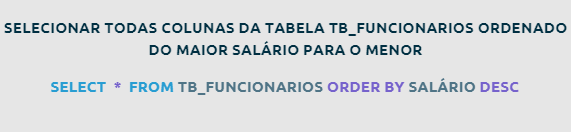

In [41]:
query = """
SELECT
*
FROM tb_funcionarios
ORDER BY SALÁRIO DESC
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  125         TI  SENIOR     6000                 1
1  148         TI  SENIOR     6000                 2
2  254        ADM  SENIOR     5600                 5
3  145  MARKETING  SENIOR     5500                 3
4  345        ADM   PLENO     4600                 4
5  258  MARKETING   PLENO     4600                 2
6  456        ADM   PLENO     4500                 2
7  136         TI  JUNIOR     2500                 0
8  365  MARKETING  JUNIOR     2300                 1
9  178        ADM  JUNIOR     2200                 0


In [42]:
query = """
SELECT
*
FROM tb_funcionarios
ORDER BY SALÁRIO ASC
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  178        ADM  JUNIOR     2200                 0
1  365  MARKETING  JUNIOR     2300                 1
2  136         TI  JUNIOR     2500                 0
3  456        ADM   PLENO     4500                 2
4  345        ADM   PLENO     4600                 4
5  258  MARKETING   PLENO     4600                 2
6  145  MARKETING  SENIOR     5500                 3
7  254        ADM  SENIOR     5600                 5
8  125         TI  SENIOR     6000                 1
9  148         TI  SENIOR     6000                 2


Você pode usar a cláusula ORDER BY para ordenar os resultados de uma consulta SQL por duas ou mais colunas. Quando você especifica múltiplas colunas na cláusula ORDER BY, os resultados são ordenados pela primeira coluna e, em caso de empate, pela segunda coluna, e assim por diante.

In [43]:
query = """
SELECT
*
FROM tb_funcionarios
ORDER BY SALÁRIO, TEMPO_NA_EMPRESA ASC
"""
result_df = run_query(query)
print(result_df)

    ID       ÁREA   CARGO  SALÁRIO  TEMPO_NA_EMPRESA
0  178        ADM  JUNIOR     2200                 0
1  365  MARKETING  JUNIOR     2300                 1
2  136         TI  JUNIOR     2500                 0
3  456        ADM   PLENO     4500                 2
4  258  MARKETING   PLENO     4600                 2
5  345        ADM   PLENO     4600                 4
6  145  MARKETING  SENIOR     5500                 3
7  254        ADM  SENIOR     5600                 5
8  125         TI  SENIOR     6000                 1
9  148         TI  SENIOR     6000                 2


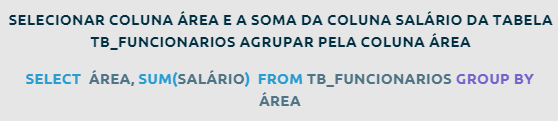

In [44]:
query = """
SELECT
ÁREA,
SUM(SALÁRIO) AS TOTAL_SALARIOS
FROM tb_funcionarios
GROUP BY ÁREA
"""
result_df = run_query(query)
print(result_df)

        ÁREA  TOTAL_SALARIOS
0        ADM           16900
1  MARKETING           12400
2         TI           14500


In [45]:
query = """
SELECT
ÁREA,
AVG(SALÁRIO) AS MEDIA_SALARIOS
FROM tb_funcionarios
GROUP BY ÁREA
"""
result_df = run_query(query)
print(result_df)

        ÁREA  MEDIA_SALARIOS
0        ADM     4225.000000
1  MARKETING     4133.333333
2         TI     4833.333333


In [46]:
query = """
SELECT
ÁREA,
AVG(SALÁRIO) AS MEDIA_SALARIOS,
SUM(SALÁRIO) AS TOTAL_SALARIOS
FROM tb_funcionarios
GROUP BY ÁREA
"""
result_df = run_query(query)
print(result_df)

        ÁREA  MEDIA_SALARIOS  TOTAL_SALARIOS
0        ADM     4225.000000           16900
1  MARKETING     4133.333333           12400
2         TI     4833.333333           14500


In [47]:
query = """
SELECT
ÁREA,
CARGO,
AVG(SALÁRIO) AS MEDIA_SALARIOS,
SUM(SALÁRIO) AS TOTAL_SALARIOS
FROM tb_funcionarios
GROUP BY ÁREA, CARGO
"""
result_df = run_query(query)
print(result_df)

        ÁREA   CARGO  MEDIA_SALARIOS  TOTAL_SALARIOS
0        ADM  JUNIOR          2200.0            2200
1        ADM   PLENO          4550.0            9100
2        ADM  SENIOR          5600.0            5600
3  MARKETING  JUNIOR          2300.0            2300
4  MARKETING   PLENO          4600.0            4600
5  MARKETING  SENIOR          5500.0            5500
6         TI  JUNIOR          2500.0            2500
7         TI  SENIOR          6000.0           12000


# **MÓDULO 25 - AULA 4**
# Treinando

Nos últimos 2 módulos aprendemos diversas formas de montarmos consultas (query) usando o SQL.
Como a grandee maioria aprendemos de forma isolada é hora de treinarmos alguns cenários utilizando mais de 1 técnica vista.

# Ex.1 Montar uma query que traz os IDs e Cargos de funcionários TI que tem salário superior a 3000.

**Interpretação**

Colunas: IDs e Cargos

Filtros: Área de TI e Salário Superior a 3000.

Agrupamento: Não

Ordenação: Não

Distintos: Não

Origem: tb_funcionários

In [48]:
query = """
SELECT
ID,
CARGO
FROM tb_funcionarios
WHERE ÁREA IN ('TI')
AND SALÁRIO > 3000
"""
result_df = run_query(query)
print(result_df)

    ID   CARGO
0  125  SENIOR
1  148  SENIOR


# Ex.2 Montar uma query os ID e salários dos funcionários de Marketing e Adm ordenados do maior para o menor salário.

**Interpretação**

Colunas: IDs e Salário

Filtros: Área de Adm e Marketing

Agrupamento: Não

Ordenação: Sim, Salário Desc

Distintos: Não

Origem: tb_funcionários

In [49]:
query = """
SELECT
ID,
SALÁRIO
FROM tb_funcionarios
WHERE ÁREA IN ('ADM','MARKETING')
ORDER BY SALÁRIO DESC
"""
result_df = run_query(query)
print(result_df)

    ID  SALÁRIO
0  254     5600
1  145     5500
2  345     4600
3  258     4600
4  456     4500
5  365     2300
6  178     2200


# Ex.3 Montar uma query que traga apenas os 3 maiores salários com suas respectivas áreas.

**Interpretação**

Colunas: Área e Salário

Filtros: Não

Agrupamento: Não

Ordenação: Sim, Salário Desc

Distintos: Não

Origem: tb_funcionários

Limite: 3

In [50]:
query = """
SELECT
ÁREA,
SALÁRIO
FROM tb_funcionarios
ORDER BY SALÁRIO DESC
LIMIT 3
"""
result_df = run_query(query)
print(result_df)

  ÁREA  SALÁRIO
0   TI     6000
1   TI     6000
2  ADM     5600


# Ex.4 Montar uma query que retorne as áreas e soma dos salários agrupado por área e ordene do maior salário para o menos.

**Interpretação**

Colunas: Área e Salário

Filtros: Não

Agrupamento: Sim, Área

Ordenação: Sim, Salário Desc

Distintos: Não

Origem: tb_funcionários


In [51]:
query = """
SELECT
ÁREA,
sum(SALÁRIO) as SALÁRIO_TOTAL
FROM tb_funcionarios
GROUP BY ÁREA
ORDER BY SALÁRIO DESC
"""
result_df = run_query(query)
print(result_df)

        ÁREA  SALÁRIO_TOTAL
0        ADM          16900
1         TI          14500
2  MARKETING          12400


# Ex.5 Montar uma query que retorne as áreas, os cargos e soma dos salários e a média do tempo empresa, agrupado por área e ordene do maior salário para o menos.

**Interpretação**

Colunas: Área, Cargo, Salário, Tempo Empresa

Filtros: Não

Agrupamento: Sim, Área e Cargo

Ordenação: Sim, Salário Desc

Distintos: Não

Origem: tb_funcionários

In [52]:
query = """
SELECT
ÁREA,
CARGO,
SUM(SALÁRIO) as SALÁRIO_TOTAL,
AVG(TEMPO_NA_EMPRESA) AS MED_TEMP_EMPRESA
FROM tb_funcionarios
GROUP BY ÁREA, CARGO
ORDER BY SALÁRIO DESC
"""
result_df = run_query(query)
print(result_df)

        ÁREA   CARGO  SALÁRIO_TOTAL  MED_TEMP_EMPRESA
0         TI  SENIOR          12000               1.5
1        ADM  SENIOR           5600               5.0
2  MARKETING  SENIOR           5500               3.0
3  MARKETING   PLENO           4600               2.0
4        ADM   PLENO           9100               3.0
5         TI  JUNIOR           2500               0.0
6  MARKETING  JUNIOR           2300               1.0
7        ADM  JUNIOR           2200               0.0
